In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_pickle('/project/cq-training-1/project1/data/catalog.helios.public.20100101-20160101.pkl')
grouped = df.groupby([df.index.year, df.index.month]).mean()

station_list = ['BND', 'TBL', 'DRA', 'FPK', 'GWN', 'PSU', 'SXF']

In [114]:
x = [datetime(year=i[0], month=i[1], day=1) for i in grouped.index]

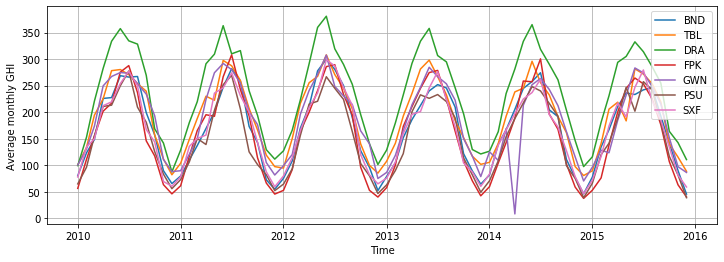

In [85]:
plt.figure(figsize=(12,4))
for station in station_list:
    plt.plot(x,grouped[f'{station}_GHI'].values)
plt.xlabel('Time')
plt.ylabel('Average monthly GHI')
plt.grid()
plt.legend(station_list)
plt.show()

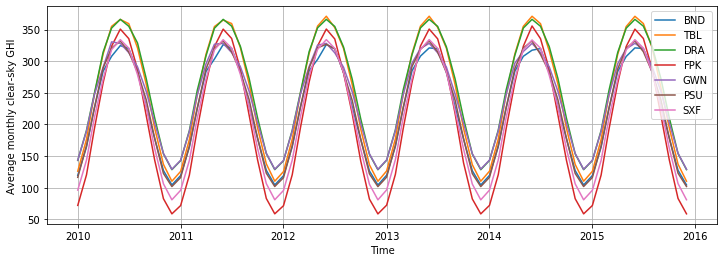

In [71]:
plt.figure(figsize=(12,4))
for station in station_list:
    plt.plot(x,grouped[f'{station}_CLEARSKY_GHI'].values)
plt.xlabel('Time')
plt.ylabel('Average monthly clear-sky GHI')
plt.grid()
plt.legend(station_list)
plt.show()

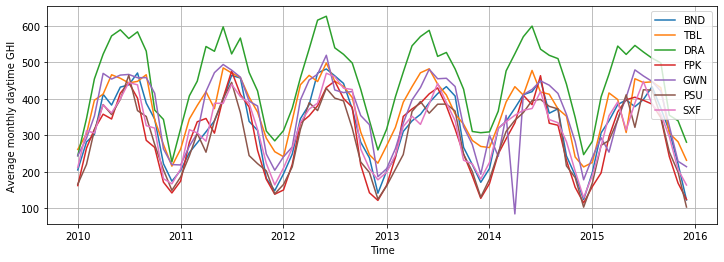

In [103]:
plt.figure(figsize=(12,4))
for station in station_list:
    df_day = df.loc[df[f'{station}_DAYTIME']==1]
    grouped_day = df_day.groupby([df_day.index.year, df_day.index.month]).mean()
    plt.plot(x, grouped_day[f'{station}_GHI'].values)
plt.xlabel('Time')
plt.ylabel('Average monthly daytime GHI')
plt.grid()
plt.legend(station_list)
plt.show()

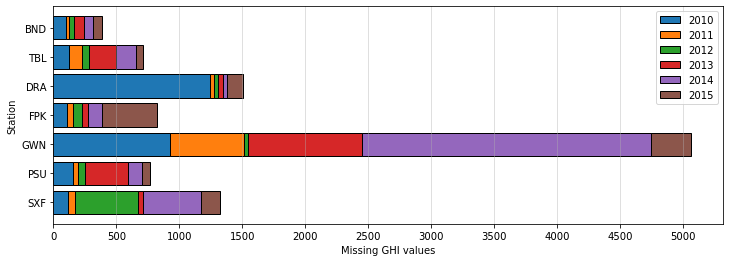

In [110]:
plt.figure(figsize=(12,4))
left = [0,0,0,0,0,0,0]
for yr in range(2010,2016):
    null_counts = []
    df_year = df.loc[df.index.year == yr]
    for station in reversed(station_list):
        null_counts.append(df_year[f'{station}_GHI'].isna().sum())
    plt.barh(list(reversed(station_list)), null_counts, left=left, edgecolor='black')
    left = [left[i] + null_counts[i] for i in range(7)]
plt.xlabel('Missing GHI values')
plt.ylabel('Station')
plt.legend(list(range(2010,2016)))
plt.xticks(range(0,5500,500))
plt.grid(axis='x', alpha=0.5)
plt.show()

In [3]:
# Get dataframe containing only rows with daytime measurements for ALL stations
df_day = df[(df['BND_DAYTIME']==1) & (df['TBL_DAYTIME']==1) & (df['DRA_DAYTIME']==1) &
            (df['FPK_DAYTIME']==1) & (df['GWN_DAYTIME']==1) & (df['PSU_DAYTIME']==1) &
            (df['SXF_DAYTIME']==1)]

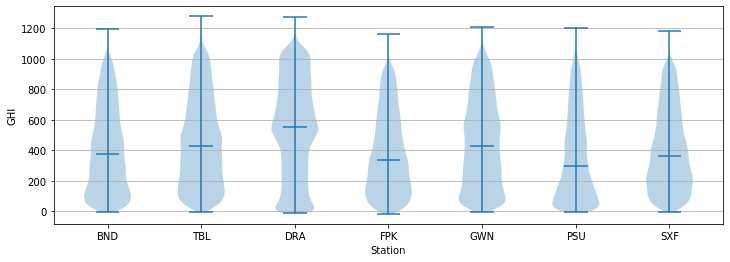

In [59]:
# Generate box plot
plt.figure(figsize=(12,4))
violin_data = [df_day[f'{s}_GHI'].dropna().values for s in station_list]
plt.violinplot(violin_data, showmedians=True)
plt.xlabel('Station')
plt.ylabel('GHI')
plt.xticks(range(1,8), station_list)
plt.grid(axis='y')
plt.show()

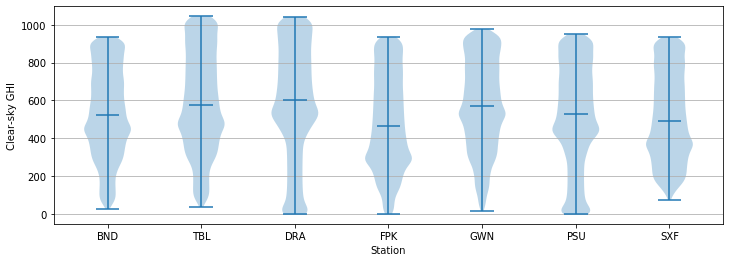

In [70]:
# Generate box plot
plt.figure(figsize=(12,4))
violin_data = [df_day[f'{s}_CLEARSKY_GHI'].dropna().values for s in station_list]
plt.violinplot(violin_data, showmedians=True)
plt.xlabel('Station')
plt.ylabel('Clear-sky GHI')
plt.xticks(range(1,8), station_list)
plt.grid(axis='y')
plt.show()

In [124]:
cloud_lists = {}
for s in station_list:
    cloud_lists[s] = list(df[df[f'{s}_CLOUDINESS'] != 'night'][f'{s}_CLOUDINESS'].value_counts(sort=False))
    cloud_lists[s] = [cloud_lists[s][i] for i in [0,3,2,1]]

cloud_names = ['clear', 'slightly cloudy', 'cloudy', 'variable']    

In [126]:
# Method to create horizontal bar plot to show multiple discrete distributions. Method taken directly from:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html
def cloud_plot(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Blues')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color, edgecolor='black')
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.25 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax

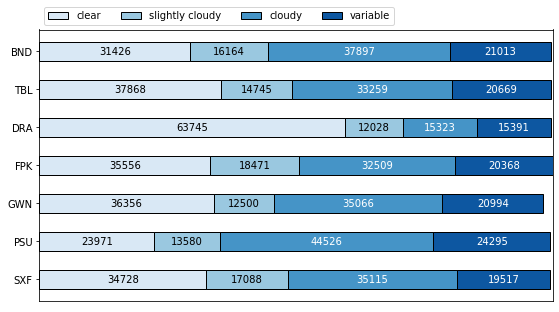

In [127]:
cloud_plot(cloud_lists, cloud_names)
plt.show()